<a href="https://colab.research.google.com/github/truongfaith/oscon-workshop/blob/master/Algotrading_Processing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT MODULES

In [0]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

# SOME ISSUES WITH IMPORTING DATA

In [0]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [0]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2019-06-28 to 2019-02-06
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


In [0]:
type(stock.index)

pandas.core.indexes.base.Index

In [0]:
stock.index = pd.to_datetime(stock.index)
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [0]:
stock['close']

KeyError: ignored

In [0]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [0]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [0]:
stock['close'].plot(figsize=(20,5), title='Microsoft (MSFT) daily closing prices'), plt.show();

TypeError: ignored

In [0]:
type(stock['close'][1])

str

In [0]:
stock = stock.astype(float)
type(stock['close'][1])

numpy.float64

# SAMPLE DATA

In [0]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2019-06-24,137.00,138.400,137.0000,137.78,20628841.0
2019-04-29,129.90,130.180,129.3500,129.77,16324183.0
2019-04-30,129.81,130.700,129.3947,130.60,24166503.0
2019-06-21,136.58,137.730,136.4600,136.97,36727892.0
2019-03-26,118.62,118.705,116.8500,117.91,26097665.0
2019-03-13,114.13,115.000,113.7800,114.50,35513771.0
2019-06-20,137.45,137.660,135.7200,136.95,33042592.0
2019-03-05,112.25,112.390,111.2300,111.70,19538318.0
2019-03-15,115.34,117.250,114.5900,115.91,54630661.0
2019-04-16,121.64,121.650,120.1000,120.77,14071787.0


# SUMMARIZE DATA

In [0]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,121.369500,122.299554,120.489624,121.508900,2.452666e+07
std,8.719059,8.806260,8.602883,8.629873,6.756623e+06
min,104.390000,105.590000,104.260300,105.250000,1.407179e+07
25%,114.437500,115.150000,114.192500,114.567500,1.947897e+07
50%,121.460000,122.565000,120.555000,121.410000,2.396963e+07
75%,127.075000,128.320000,126.475000,127.835000,2.802158e+07
max,137.450000,138.400000,137.000000,137.780000,5.463066e+07


# VISUALIZE DATA

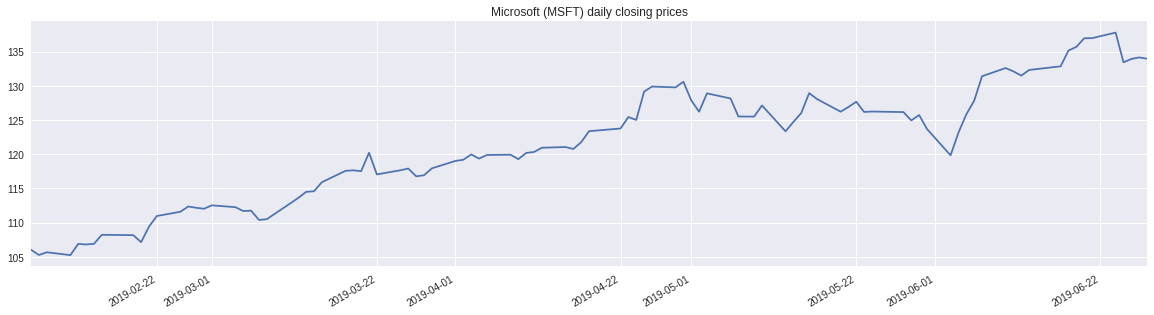

In [0]:
stock['close'].plot(figsize=(20,5), title='Microsoft (MSFT) daily closing prices'), plt.show();

# EXPLORING SIGNALS

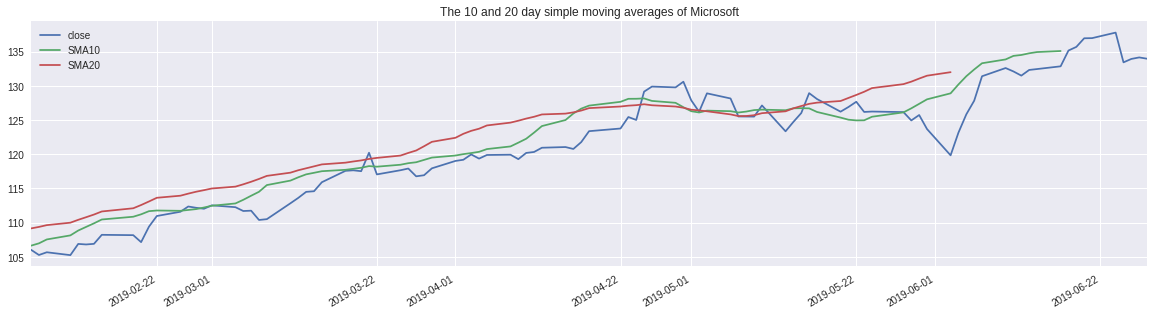

In [0]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close','SMA10', 'SMA20']].plot(figsize=(20,5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'), plt.show();

# **SOME MORE ISSUES WITH IMPORTING DATA**

In [0]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-06-28,134.57,134.60,133.1558,133.96,30042969.0,NaN,NaN
2019-06-27,134.14,134.71,133.5100,134.15,16557482.0,NaN,NaN
2019-06-26,134.35,135.74,133.6000,133.93,23657745.0,NaN,NaN
2019-06-25,137.25,137.59,132.7300,133.43,33327420.0,NaN,NaN
2019-06-24,137.00,138.40,137.0000,137.78,20628841.0,NaN,NaN


In [0]:
stock = stock.sort_index(ascending = True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-02-06,107.000,107.00,105.5300,106.03,20609759.0,106.636,109.1565
2019-02-07,105.185,105.59,104.2900,105.27,29760697.0,106.974,109.3745
2019-02-08,104.390,105.78,104.2603,105.67,21461093.0,107.544,109.6365
2019-02-11,106.200,106.58,104.9650,105.25,18914123.0,108.136,109.9945
2019-02-12,106.140,107.14,105.4800,106.89,25056595.0,108.847,110.4130


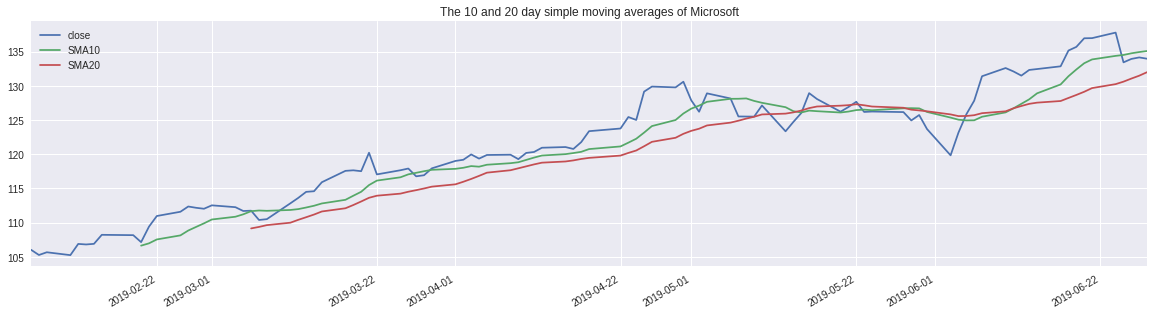

In [0]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close','SMA10', 'SMA20']].plot(figsize=(20,5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'), plt.show();

In [0]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-02-06,107.000,107.00,105.5300,106.03,20609759.0,NaN,NaN
2019-02-07,105.185,105.59,104.2900,105.27,29760697.0,NaN,NaN
2019-02-08,104.390,105.78,104.2603,105.67,21461093.0,NaN,NaN
2019-02-11,106.200,106.58,104.9650,105.25,18914123.0,NaN,NaN
2019-02-12,106.140,107.14,105.4800,106.89,25056595.0,NaN,NaN


              open    high       low   close      volume    SMA10     SMA20
2019-03-06  111.87  112.66  111.4300  111.75  17686996.0  111.677  109.1565
2019-03-07  111.40  111.55  109.8650  110.39  25338954.0  111.775  109.3745
2019-03-08  109.16  110.71  108.8000  110.51  22818430.0  111.729  109.6365
2019-03-11  110.99  112.95  110.9800  112.83  26491618.0  111.853  109.9945
2019-03-12  112.82  113.99  112.6499  113.62  26132717.0  111.979  110.4130


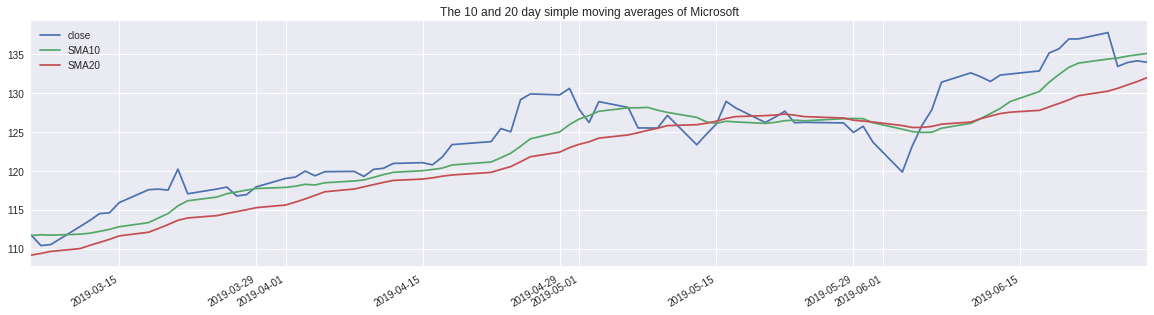

In [0]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close','SMA10', 'SMA20']].plot(figsize=(20,5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'), plt.show();

#EVALUATING SIGNALS

In [0]:
signal = pd.DataFrame()
signal['crossover']= stock['SMA10'] - stock['SMA20']
signal.tail()

,crossover
2019-06-24,4.1300
2019-06-25,3.8995
2019-06-26,3.6940
2019-06-27,3.4560
2019-06-28,3.0930


In [0]:
stock = stock.join(signal, how='left')
stock.tail()

,open,high,low,close,volume,SMA10,SMA20,crossover
2019-06-24,137.00,138.40,137.0000,137.78,20628841.0,134.376,130.2460,4.1300
2019-06-25,137.25,137.59,132.7300,133.43,33327420.0,134.509,130.6095,3.8995
2019-06-26,134.35,135.74,133.6000,133.93,23657745.0,134.753,131.0590,3.6940
2019-06-27,134.14,134.71,133.5100,134.15,16557482.0,134.936,131.4800,3.4560
2019-06-28,134.57,134.60,133.1558,133.96,30042969.0,135.087,131.9940,3.0930


In [0]:
signal['close-close'] = stock['close'].diff()
signal.head()

,crossover,close-close
2019-03-06,2.5205,NaN
2019-03-07,2.4005,-1.36
2019-03-08,2.0925,0.12
2019-03-11,1.8585,2.32
2019-03-12,1.5660,0.79


In [0]:
signal.dropna(inplace=True)
quality = (signal['crossover'] > 0) & (signal['close-close'] > 0) | (signal['crossover'] < 0) & (signal['close-close'] < 0)
quality.head()

2019-03-07    False
2019-03-08     True
2019-03-11     True
2019-03-12     True
2019-03-13     True
dtype: bool

In [0]:
quality = quality.astype(int)
quality.head()

2019-03-07    0
2019-03-08    1
2019-03-11    1
2019-03-12    1
2019-03-13    1
dtype: int64

In [0]:
proportion_correct = quality.sum()/quality.count()
proportion_correct

0.625

In [0]:
information_coefficient = 2*proportion_correct - 1
information_coefficient

0.25

In [0]:
signal.corr(method='spearman')

,crossover,close-close
crossover,1.000000,-0.085562
close-close,-0.085562,1.000000
